<a href="https://colab.research.google.com/github/falwa-alkhalifah/Mining-project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from scipy import stats
import numpy as np

url = 'https://raw.githubusercontent.com/falwa-alkhalifah/Mining-project/refs/heads/main/Dataset/Dataset%20of%20Diabetes%20.csv'

df  = pd.read_csv(url)

**Summmry of dataset and statical summaries**:

In [3]:
#samples of dataset:
print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


Take a sample of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


Metadata about the DataFrame

In [5]:
df.describe()


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


Descriptive statistics

The variance values indicate how spread out the data points are for each column. The column No_Pation has the highest variance, meaning its values are highly dispersed, while HDL has the lowest variance, showing less variation in the data.

In [6]:
# excepting the column 'ID' bc they're IDs & No_pation for containing letters

numeric_cols = df.iloc[:, 2:].select_dtypes(include=['number']).columns
overall_variance = df[numeric_cols].var()
print("Overall Variance:\n", overall_variance)

Overall Variance:
 AGE        77.426643
Urea        8.615196
Cr       3598.169921
HbA1c       6.421172
Chol        1.694521
TG          1.963294
HDL         0.436146
LDL         1.243452
VLDL       13.421960
BMI        24.625296
dtype: float64


**missing values**:

In [7]:
Missing_Values = df.isna().sum()
print(Missing_Values)

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


**Graphs**:

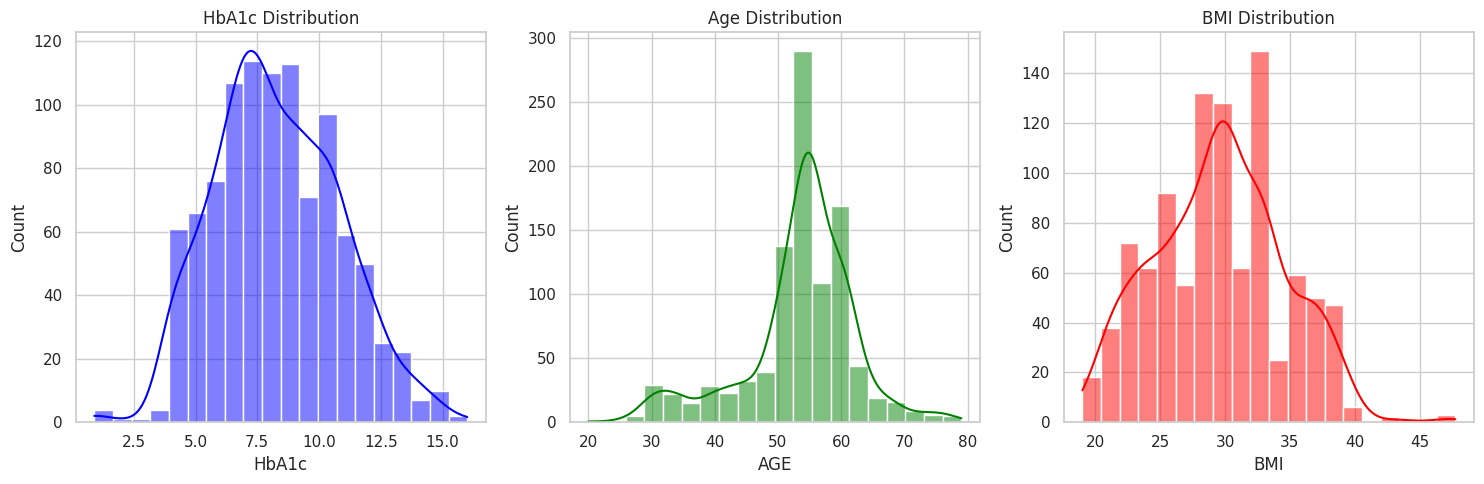

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Clean the class column (remove spaces)
df['CLASS'] = df['CLASS'].str.strip()

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['HbA1c'], kde=True, color='blue', bins=20)
plt.title('HbA1c Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['AGE'], kde=True, color='green', bins=20)
plt.title('Age Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['BMI'], kde=True, color='red', bins=20)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

Histograms: the histogram illustrates the distribution for HbA1c, Age and BMI, since hbA1c is a critical diabetes biomarker that reflects the average blood sugar levels over 3 months, age selected to analyze the age demographics and BMI reflects obesity. The histogram indicates that more patients have controlled HbA1c since it is right skewed, most patients are middle-aged and many patients are overweight since the BMI histogram shows a peak.

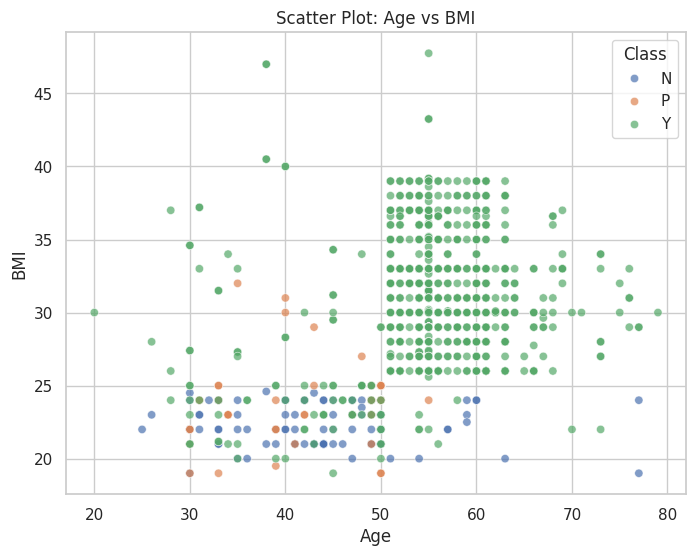

In [9]:
# Scatter Plot (AGE vs BMI )
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AGE'], y=df['BMI'], hue=df['CLASS'], alpha=0.7)
plt.title("Scatter Plot: Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Class")
plt.show()



Scatter plot Age vs BMI: we wanted to investigate if diabtetes has a strong relatioship with aging and obesity, the graph shows that diabetic (Y) and predict-diabbetic (P) cluster at higher BMIs (>=25) in patients aged >45

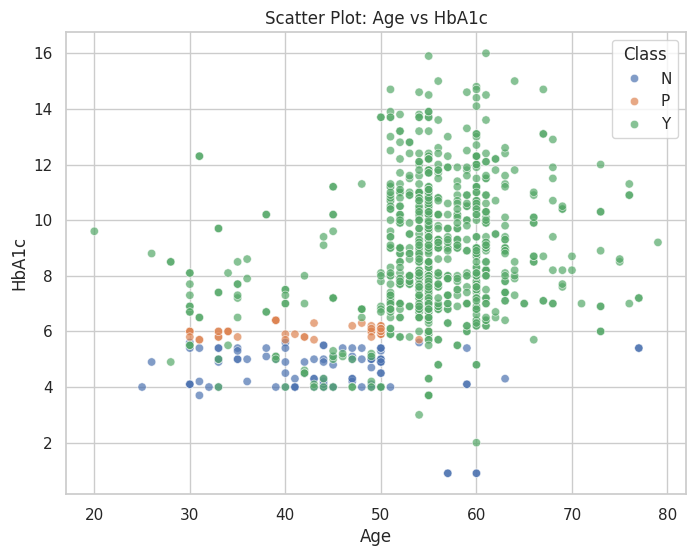

In [10]:
# scatter plot (Age vs HbA1c)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AGE'], y=df['HbA1c'], hue=df['CLASS'], alpha=0.7)
plt.title("Scatter Plot: Age vs HbA1c")
plt.xlabel("Age")
plt.ylabel("HbA1c")
plt.legend(title="Class")
plt.show()

Scatter plot Age vs HbA1c: we wanted to investigate the relationship between blood sugar control ang aging with diabtes. It shows that diabetic patients(P) cluster at elevated HbA1c (>6.5) accross all ages, with the highest values observed in patients over 50

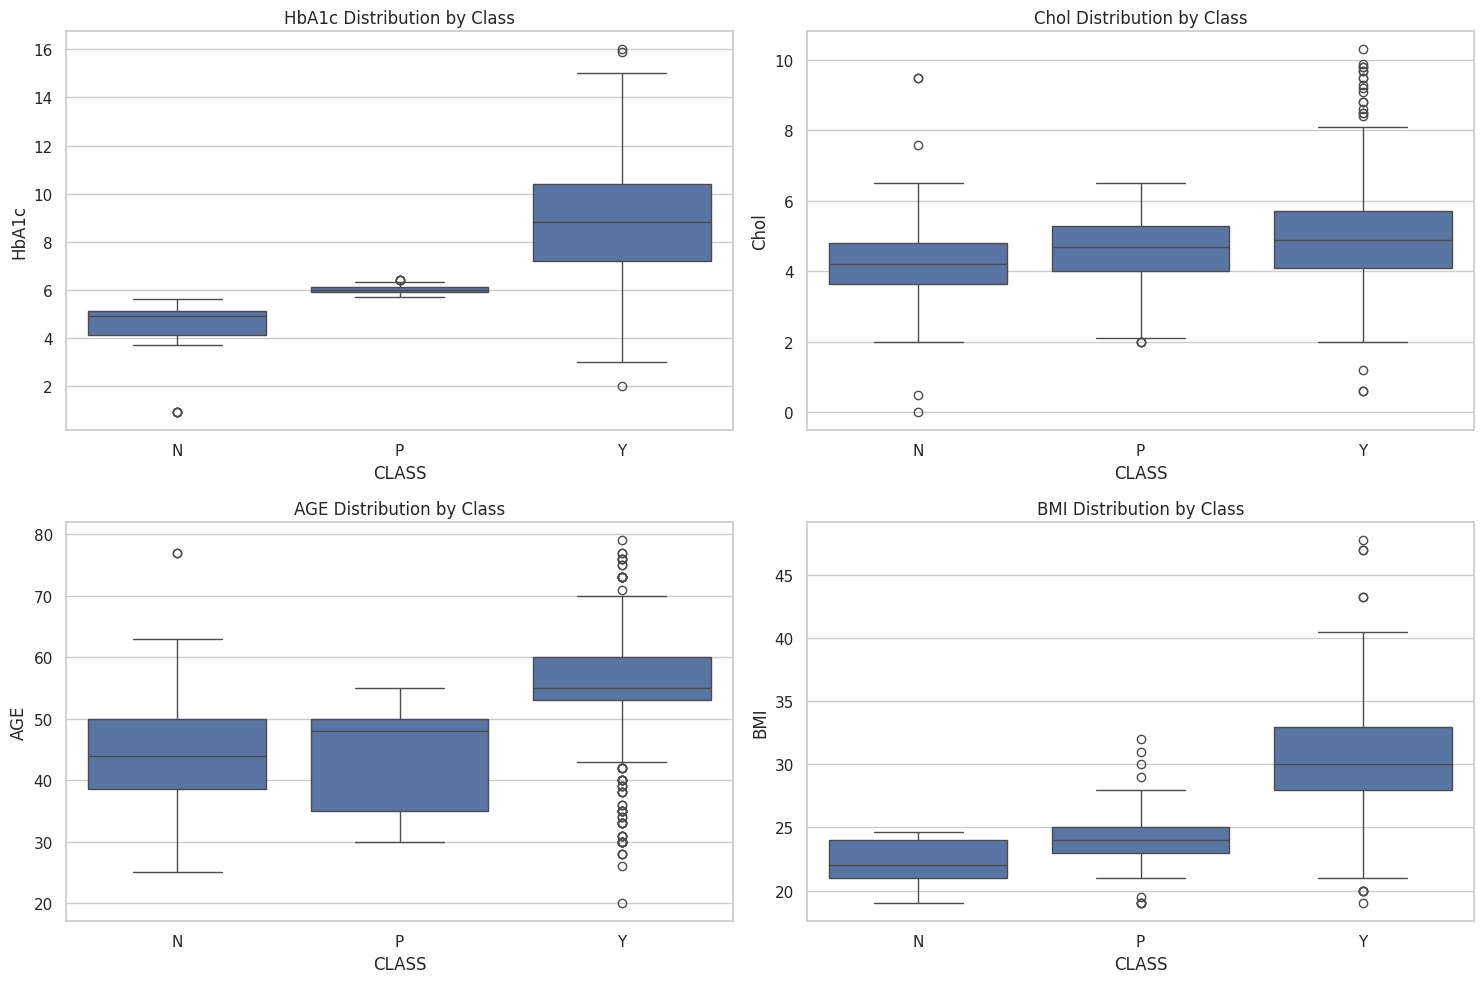

In [11]:
# Box Plots for attributes vs. CLASS
variables = ['HbA1c', 'Chol', 'AGE', 'BMI']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='CLASS', y=var, data=df)
    plt.title(f'{var} Distribution by Class')
plt.tight_layout()
plt.show()

Box plots for HbA1c, cholesterol(Chol), Age and BMI vs class: we wanted to compare blood sugar and cholesterol levels across diabetic, predict-diabetic and non-diabetic patients, and to observe demographic and obesity trends by class. As an outcome, we may notice that diabetic patients(Y) have significantly higher hbA1c that other groups, cholesterol shows similar distributions across classes, suggesting limited predictive power, diabetic patients(N) are older than the median compared to non-diabetic (N) and higher BMI is noticed for diabetic (Y) and predict-diabetic (P) cases compared to non-diabetic (N) ones.

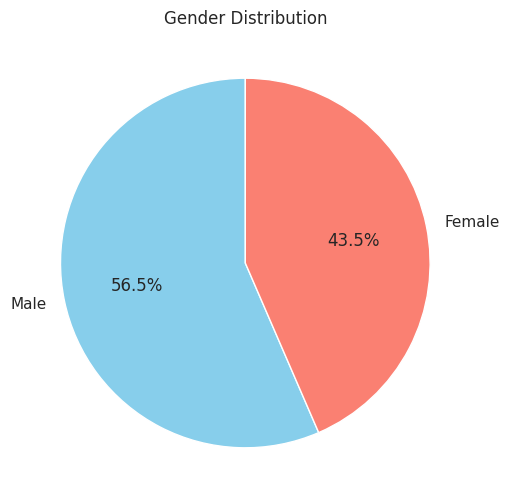

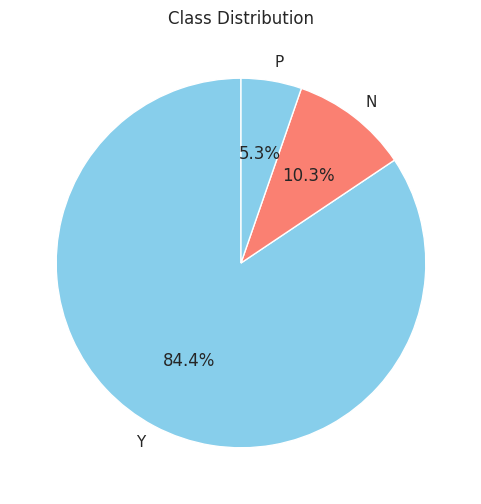

In [12]:
# Pie Chart for gender
df['Gender'] = df['Gender'].str.strip().str.upper()
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, labels=['Male','Female'])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

# Pie Chart for class distribution
plt.figure(figsize=(6, 6))
df['CLASS'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title("Class Distribution")
plt.ylabel('')
plt.show()

Pie chart for gender and class: to check gender and class balance in the dataset, it shows slightly more female patients which is consistent with studies showing higher diabetes prevalence in women, however, is indicates an imbalance in the class with non-diabetic (N) group domninating

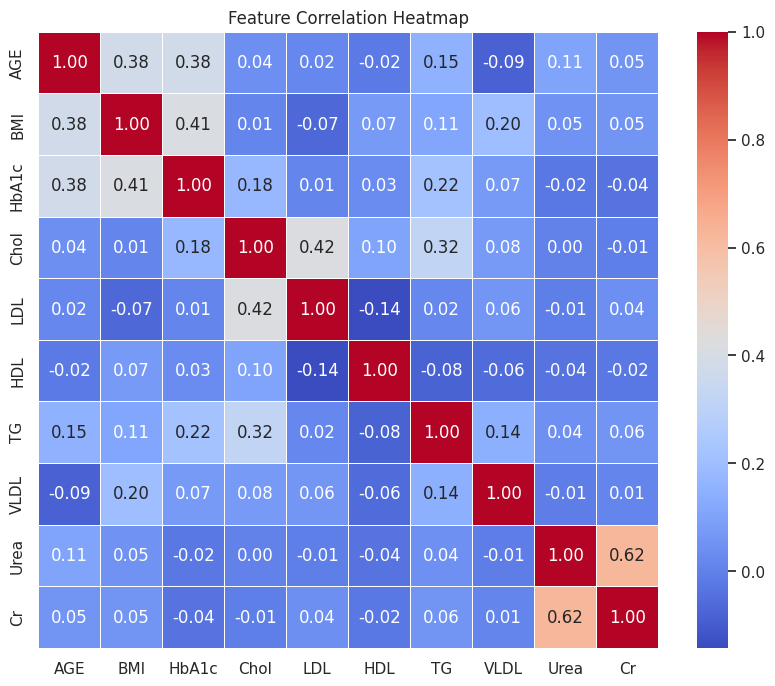

In [13]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
features = ['AGE', 'BMI', 'HbA1c', 'Chol', 'LDL', 'HDL', 'TG', 'VLDL', 'Urea', 'Cr']
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Correlation Heatmap: between all numeric variables in the dataset, including: AGE, BMI, HbA1c, Chol, LDL, TG, VLDL, Urea and Cr, to identify relationships between clinical biomarkers and their collective impact on diabetes risk.

**----------------------------------------------**

**Data Cleaning**:

**Dublicate Data**:
First, eliminating any duplicate rows, if any: As shown below we didn't find any duplicated rows.

In [14]:
# Check for duplicates
duplicates = df.duplicated()
# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


**filling missing values**: As shown above there is no any Null values in our data set, but We believe that the zeros in some columns such as HbA1c,
,Chol,TG,HDL,LDL,VLDL,BMI are actually missing values ​​and have been filled with zeros; due to the fact that these values can not be 0 for any human. So we decided to treat these zeros in the mentioned columns as missing values and then replace it with the mean of the column.

In [15]:
# Specify the columns to modify
columns_to_modify = ['HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI',]

# Calculate the mean for each column and replace 0s with the mean
for column in columns_to_modify:
    mean_value = df[column].replace(0, pd.NA).mean()  # Calculate mean excluding 0s
    df[column] = df[column].replace(0, mean_value)  # Replace 0s with the mean

# Print the modified DataFrame
print(df)

      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
0    24.0     N  
1    23.0     N

**detect and remove outliers**:
 identify outliers by using IQR method, calculating the range between the first quartile (Q1) and the third quartile (Q3), then we removed detected outliers.

In [16]:
df_numeric = df.select_dtypes(include=['number'])

# Calculate IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Detect Outliers
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove Outliers
df_cleaned = df[~outliers]


print("number of outliers", outliers.sum())
print("data after cleaning:")
print(df_cleaned)

number of outliers 371
data after cleaning:
      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
5    634      34224      F   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4   
6    721      34225      F   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6   
7    421      34227      M   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4   
13   132      34234      F   45   4.6  54    5.1   4.2  1.7  1.2  2.2   0.8   
14   402      34235      F   50   3.5  39    4.0   4.0  1.5  1.2  2.2   0.7   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
965  159      45446      M   54   5.0  88    6.8   6.7  3.7  0.9  2.9   1.7   
973  170      45395      M   50   4.8  70    8.0   5.2  2.7  1.4  2.7   1.2   
978  176      45445      M   52   5.1  70    7.0   7.5  1.7  1.2  1.8   0.6   
991  195       4543      F   55   4.1  34   13.9   5.4  1.6  1.6  3.1   0.7   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      B

**----------------------------------------------**

**Data Transformation**:

**Normlization**:
Normalization was performed to ensure consistent data scale. The normalization technique applied is max-min normalization. This technique scales specific attribute values ​​to a specified range from 0 to 1. The following attributes were selected for normalization: ['BMI', 'Urea', 'Cr','Chol', 'TG', 'HDL', 'LDL', 'VLDL','HbA1c']

In [17]:
#Extract Columns to normlize
columns_to_normalize = ['BMI', 'Urea', 'Cr','Chol', 'TG', 'HDL', 'LDL', 'VLDL','HbA1c']
data_to_normlize = df[columns_to_normalize]
#Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normlized_data_minmax = minmax_scaler.fit_transform(data_to_normlize)

#Replace the normlized values in the original DataFrame
df[columns_to_normalize] = normlized_data_minmax

print("min-max scaled data:")

print(df)

min-max scaled data:
      ID  No_Pation Gender  AGE      Urea        Cr     HbA1c      Chol  \
0    502      17975      F   50  0.109375  0.050378  0.264901  0.377551   
1    735      34221      M   26  0.104167  0.070529  0.264901  0.326531   
2    420      47975      F   50  0.109375  0.050378  0.264901  0.377551   
3    680      87656      F   50  0.109375  0.050378  0.264901  0.377551   
4    504      34223      M   33  0.171875  0.050378  0.264901  0.448980   
..   ...        ...    ...  ...       ...       ...       ...       ...   
995  200     454317      M   71  0.273438  0.114610  0.403974  0.714286   
996  671     876534      M   31  0.065104  0.068010  0.754967  0.367347   
997  669      87654      M   30  0.171875  0.094458  0.384106  0.367347   
998   99      24004      M   38  0.138021  0.066751  0.384106  0.489796   
999  248      24054      M   54  0.117188  0.076826  0.397351  0.336735   

           TG       HDL       LDL      VLDL       BMI CLASS  
0    0.044444  0


**discretization**: we applied discretization to the "Age" column to simplify the continuous age data by grouping it into meaningful age ranges, the ranges are [0-30 , 31-50 , 51-100] This helps reduce noise, improve interpretability, and may enhance model performance by capturing patterns more effectively in categories rather than treating age as a continuous variable.

In [18]:
#Discretization for column (Age)
columns_to_Discretize = 'AGE'

#The boundaries of the bins
bns = [0, 30 , 50 , 100]

#Labels for the age groups
labls = ['0-30' , '31-50' , '51-100']

#Perform discretization using cut function
df['AgeGroup'] = pd.cut(df[columns_to_Discretize] , bins=bns , labels= labls )

#Display the Discretizied columns
print("original DataFrame:")
print(df[['AGE' ,'AgeGroup']])

original DataFrame:
     AGE AgeGroup
0     50    31-50
1     26     0-30
2     50    31-50
3     50    31-50
4     33    31-50
..   ...      ...
995   71   51-100
996   31    31-50
997   30     0-30
998   38    31-50
999   54   51-100

[1000 rows x 2 columns]


**Encoding**: Encoding the class And Gender columns, by converting categorical values into numerical format,to ensures all data is numeric and consistent for analysis and modeling.

In [19]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['CLASS'] = le.fit_transform(df['CLASS'])
print(df)

      ID  No_Pation  Gender  AGE      Urea        Cr     HbA1c      Chol  \
0    502      17975       0   50  0.109375  0.050378  0.264901  0.377551   
1    735      34221       1   26  0.104167  0.070529  0.264901  0.326531   
2    420      47975       0   50  0.109375  0.050378  0.264901  0.377551   
3    680      87656       0   50  0.109375  0.050378  0.264901  0.377551   
4    504      34223       1   33  0.171875  0.050378  0.264901  0.448980   
..   ...        ...     ...  ...       ...       ...       ...       ...   
995  200     454317       1   71  0.273438  0.114610  0.403974  0.714286   
996  671     876534       1   31  0.065104  0.068010  0.754967  0.367347   
997  669      87654       1   30  0.171875  0.094458  0.384106  0.367347   
998   99      24004       1   38  0.138021  0.066751  0.384106  0.489796   
999  248      24054       1   54  0.117188  0.076826  0.397351  0.336735   

           TG       HDL       LDL      VLDL       BMI  CLASS AgeGroup  
0    0.044444  

**----------------------------------------------**

**Features Selection**:

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder


df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['CLASS'] = LabelEncoder().fit_transform(df['CLASS'])

X = df.drop(columns=["CLASS"])
X = X.select_dtypes(include=["number"])

selector = SelectKBest(score_func=f_classif, k=5)

X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

NameError: name 'y' is not defined

In [21]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X)

selected_features = X.columns[selector.get_support()]
print("Selected Features after Variance Threshold:", selected_features.tolist())


Selected Features after Variance Threshold: ['ID', 'No_Pation', 'Gender', 'AGE']


The SelectKBest method identified the top five most relevant features for classification: AGE, HbA1c, Chol, TG, and BMI, based on their statistical significance using the ANOVA F-value. This suggests that age, blood sugar levels, cholesterol, triglycerides, and BMI are key factors in predicting the target variable.

The VarianceThreshold method removed low-variance features but retained most columns, including ID and No_Pation, which are not useful for prediction. While this confirms that most features have sufficient variance, further preprocessing—such as removing irrelevant columns and normalizing numerical data—may improve model performance.

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt


df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["CLASS"] = LabelEncoder().fit_transform(df["CLASS"])

#y = df["CLASS"].values  # Convert to 1D NumPy array

X = df.drop(columns=["CLASS"])
X = X.select_dtypes(include=["number"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

print("Decision Tree (Gini Index):")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

print("\nDecision Tree (Entropy - Information Gain):")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

plt.figure(figsize=(12, 6))
# Assuming you have 3 classes (0, 1, and 2), adjust class_names accordingly
tree.plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1", "Class 2"])
plt.title("Decision Tree (Gini Index)")
plt.show()

plt.figure(figsize=(12, 6))
# Assuming you have 3 classes (0, 1, and 2), adjust class_names accordingly
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1", "Class 2"])
plt.title("Decision Tree (Entropy - Information Gain)")
plt.show()

NameError: name 'y' is not defined

In [24]:
#saving dataset after pre-preprocessing
df.to_csv('/workspaces/Mining-project/Dataset/Processed_dataset.csv', index=False)
#the pre-preprocessed-dataset is saved in Dataset folder where the original dataset is saved